<a href="https://colab.research.google.com/github/Howida100/Prediction-Projects-Using-Python/blob/main/Exploratory%20Data%20Analysis/Exploratory_data_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the data using python.

## In this tutorial, we will use the exploratory data analysis approach to summarize and analyze the main characteristics of a cars data set.

![alt text](https://www.statistika.co/images/services/Exploratory%20Data%20Analysis%20-%20EDA%201000x468.jpg)

## Let us understand how to explore the data using python and later build a machine learning model on that data in the next tutorial.

## 1) Choosing a Data Set

I chose a data-set titled “Cars” data from Kaggle the author of this data set is Lilit Janughazyan [1]. From my childhood, I was interested in and fascinated about cars. I still remember I used to maintain a book wherein I used to stick all the pictures of different cars along with its specifications. I was more up to date about the latest cars and their specifications. I was more like a specs sheet remembering almost all information about cars explaining people about different cars available in the market. And it was my dream when I was young that I wanted to predict the prices of cars given its specifications. With the help of this interest, I wanted to choose a data set based on Cars in this assignment. I wanted to fulfill my dream of creating a model that would be fed with the specifications of the cars such as Horsepower, Cylinders or Engine Size, and then the model should predict the price of the car based on these specifications. The data set can be found here: [Cars dataset](https://www.kaggle.com/ljanjughazyan/cars1)

The main reason for me choosing the data set over others was that there were almost 110 data sets about cars under the most voted category in Kaggle (the most voted meaning the best and famous collection of data sets that are available on Kaggle) almost all these data sets had one or the other features missing. For example, the data set “Automobile Data set” [2] had most features of a car but did not have a price feature in it, which is the most important feature according to my interest. Hence I took a lot of time short-listing many data sets and then I concluded the “Cars” data set because this data set had almost every important feature of a car such as Horsepower, MSRP, Invoice, Cylinders, Engine Size and many more because of these good features this was the main reason I chose this data set over the other data sets available in Kaggle.


This data set was straightaway stored in a CSV (Comma Separated Value) format on Kaggle. I did not have to perform any operations to get the data into a format. Since the data was already in a CSV format it needed very little work to import the data set all I had to do is just download, read the CSV data and store it in a pandas data frame, for this I had to import pandas library. 



---



## 2) Obtaining the data

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a “> “(greater than symbol). On clicking that you will find a tab with three options, out of which you have to select Files. Then you can easily upload your dataset with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. This is how I got the dataset into my notebook.


---



## 3) Scrubbing and Formatting


**Formatting the data into a data frame**

Since the data set was already in a CSV format. All I had to do is just format the data into a pandas data frame. This was done by using a pandas data frame method called (read_csv) by importing pandas library. The read_csv data frame method was used by passing the filename as an argument. And then by executing this, it converted the CSV file into a neatly organized pandas data frame format.






In [ ]:
# Importing the required libraries
import pandas as pd               
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [3]:
# Loading the CSV file into a pandas dataframe.
df = pd.read_csv("CARS.csv")
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [4]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')



---



In [5]:
df.shape

(428, 15)

**Determining instances and the number of features.**

This data set has 428 instances and 15 features also called as rows and columns. The instances here represent different car brands such as BMW, Mercedes, Audi, and 35 more, features represent Make, Model, Type, Origin, Drive Train, MSRP, Invoice, Engine Size, Cylinders, Horsepower, MPG-City, MPG-Highway, Weight, Wheelbase, and Length of the car.

---



**Removing irrelevant features.**

I will remove some features such as Drive Train, Model, Invoice, Type, and Origin from this dataset. Because these features do not contribute to the prediction of price. As of now, I will remove the Drive Train, the Drive Train will not support for predicting the price of the car because most of the cars in this data set were front-wheel drive (52.8%) and the rest were rear wheel and all wheel drive. 

Similarly, the model, type and origin are irrelevant and are not needed in this context, it’s the brand which is important not the model of the car, and when it comes to type of the car most of the cars were of type Sedan and I kept the weight and length features of the cars in which case I can easily determine whether if it’s an SUV, Sedan or a truck. I will also be removing the Invoice feature of the car because I have the MSRP as the price I don't need the invoice because having any one type of price of the car makes more sense and it prevents in leading in ambiguous results (because both MSRP and Invoice are very closely related and you cannot predict the MSRP given the invoice). Lastly, the origin of cars has nothing to do with the prediction rate so I had to remove it and most of the cars were originated from Europe.





In [6]:
# Removing irrelevant features
df = df.drop(['Model','DriveTrain','Invoice', 'Origin', 'Type'], axis=1)
df.head(5)

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,"$43,755",3.5,6.0,225,18,24,3880,115,197




---



## 4) Exploratory Data Analysis

**Identifying the type of data using info()**

To identify the data types, I use the info method. The info method prints a summary of the data in the data frame along with its data types. Here, there are 428 entries (0-427 rows). The data frame after removing irrelevant columns comprises 10 columns. Here the Make, MSRP  are of an object type whereas Engine size and Cylinders are of float type and Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase and Length are of integer type. Hence there are 2 object types, 2 float types and 6 integer types of data present in the data frame. 

In [7]:
# To identify the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   MSRP         428 non-null    object 
 2   EngineSize   428 non-null    float64
 3   Cylinders    426 non-null    float64
 4   Horsepower   428 non-null    int64  
 5   MPG_City     428 non-null    int64  
 6   MPG_Highway  428 non-null    int64  
 7   Weight       428 non-null    int64  
 8   Wheelbase    428 non-null    int64  
 9   Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 33.6+ KB




---



**Finding the dimensions of the data frame**

To get the number of rows and columns of the data frame, I used the shape method. The shape method gets the number of rows and the number of columns of the data frame. Here, there are 428 rows and 10 columns. Hence the shape method returns (428, 10). And to find the dimensions of the data frame I used ndim (dimension) method. This method prints the dimensions of the data frame. Here, the whole data frame is of 2 dimensional (rows and columns).





In [10]:
# Getting the number of instances and features
df.shape

(428, 10)

In [11]:
# Getting the dimensions of the data frame
df.ndim

2



---



**Finding the duplicate data.**

This is a handy thing to perform on a data set because often there might be duplicate or redundant data in the data sets, to remove this I used the MSRP as a reference such that there cannot be more than two same MSRP prices of the car, it shows that few data are redundant because prices of the cars can never match very accurately. So before removing the duplicates, there were 428 rows and after removing there are 410 meaning that there were 18 duplicate data.

In [12]:
df = df.drop_duplicates(subset='MSRP', keep='first')
df.count()

Make           410
MSRP           410
EngineSize     410
Cylinders      408
Horsepower     410
MPG_City       410
MPG_Highway    410
Weight         410
Wheelbase      410
Length         410
dtype: int64



---



**Finding the missing or null values.**

Many times there might be a lot of missing values in the dataset. There are several approaches to deal with this scenario either we can drop those values or fill those values with the mean of that column. Here, 2 entries were having N/A in the Cylinders feature. This can be found by using the is_null( ) method which returns the null or missing values in the data frame. So rather than deleting those two entries, I filled those values with the mean of the cylinders columns and their value came as 6.0 each. I was able to find this while I was peeking at the first and last few rows of the data set. I think rather than deleting this is a good approach because every entry of data is vital. 

In [13]:
# To peek at first five rows
df.head(5)

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,"$43,755",3.5,6.0,225,18,24,3880,115,197


In [14]:
# To peek at last five rows
df.tail(5)

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,"$40,565",2.4,5.0,197,21,28,3450,105,186
424,Volvo,"$42,565",2.3,5.0,242,20,26,3450,105,186
425,Volvo,"$45,210",2.9,6.0,268,19,26,3653,110,190
426,Volvo,"$26,135",1.9,4.0,170,22,29,2822,101,180
427,Volvo,"$35,145",2.5,5.0,208,20,27,3823,109,186


While using both head and tail method I found out that there were two values stored a NaN (Not a number) in the Cylinders features. So I printed them by using the slicing technique of mentioning their index.

In [15]:
# Finding the null values
print(df.isnull().sum())

Make           0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [16]:
# Printing the null value rows
df[240:242]

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,"$25,700",1.3,NaN,197,18,25,3053,106,174
248,Mazda,"$27,200",1.3,NaN,238,18,24,3029,106,174


In [17]:
# Filling the rows with the mean of the column
val = df['Cylinders'].mean()
df['Cylinders'][247] = round(val)

val = df['Cylinders'].mean()
df['Cylinders'][248]= round(val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  




---



**Converting the object values to integer type.**

While having a look at the data, the MSRP was stored as an object type. This is a serious problem because it is impossible to plot those values on a graph because it is a primary requirement that during plotting a graph all the values must be of type integer data. The author has stored, the MSRP in a different format ($36, 000) so I had to remove the formatting and then convert them to an integer.




In [18]:
# Removing the formatting
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.




---



**Detecting Outliers**

An outlier is a point or set of points different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. I will perform the IQR score technique to detect and remove the outliers. Often outliers can be seen with visualizations using a box plot. Shown below is the box plot of MSRP. In the plot, you can find some points are outside the box they are none other than outliers. I referred the above outlier technique from towards data science article which can be found in the references section [3].

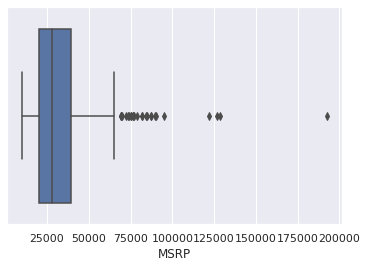

In [20]:
sns.boxplot(x=df['MSRP'])

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSRP           19086.50
EngineSize         1.55
Cylinders          2.00
Horsepower        85.00
MPG_City           4.00
MPG_Highway        5.00
Weight           872.25
Wheelbase          9.00
Length            16.00
dtype: float64


In [23]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


After using the technique now as seen below the MSRP box plot contains no outlier points this is a big improvement. Previously there were over 15 points of outliers now I have removed those outliers.

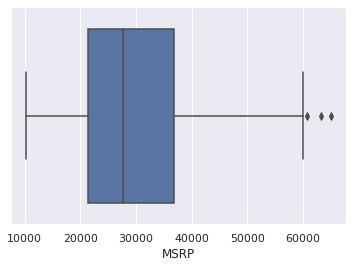

In [24]:
sns.boxplot(x=df['MSRP'])



---



**Performing a 5 number summary (min, lower quartile, median, upper
quartile, max)**

Next step is to perform a 5-number summary for the numeric data. As discussed earlier the numeric data, in this case, are MSRP, Engine Size, Horsepower, Cylinders, Horsepower, MPG_City, MPG_Highway, Weight, Wheelbase, and Length. The five-number summary includes minimum, lower quartile, median, upper quartile, and the maximum values all these values can be obtained by using the describe method.







In [25]:
df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,29791.682099,3.102160,5.694444,209.777778,19.614198,26.583333,3541.876543,107.746914,186.259259
std,11024.164921,0.889513,1.308167,54.125642,2.914029,3.835128,564.457566,5.831814,11.569446
min,10280.000000,1.300000,4.000000,104.000000,13.000000,17.000000,2403.000000,95.000000,158.000000
25%,21436.250000,2.400000,4.000000,170.000000,18.000000,25.000000,3194.750000,104.000000,178.000000
50%,27635.000000,3.000000,6.000000,208.000000,19.000000,26.000000,3470.000000,107.000000,187.000000
75%,36907.500000,3.500000,6.000000,240.000000,21.000000,29.000000,3837.000000,112.000000,193.000000
max,65000.000000,5.700000,8.000000,350.000000,27.000000,36.000000,5270.000000,124.000000,215.000000




---



**Plotting different features against one another.**



**Histogram**

Histogram refers to the frequency of occurrence of variables in an interval. Here, there are mainly 10 different car manufacturing companies, but it is often important to know who has the maximum number of cars. I'm just plotting histograms to find the total number of car manufacturers and this plot does not support my predictions or doesn't have relations with the price feature. Plotting a histogram is one of a trivial solution which lets us know the total number of different car manufacturers. From the histogram below it can be seen that Ford has almost several cars (20) followed by Chevrolet (19) and many more.

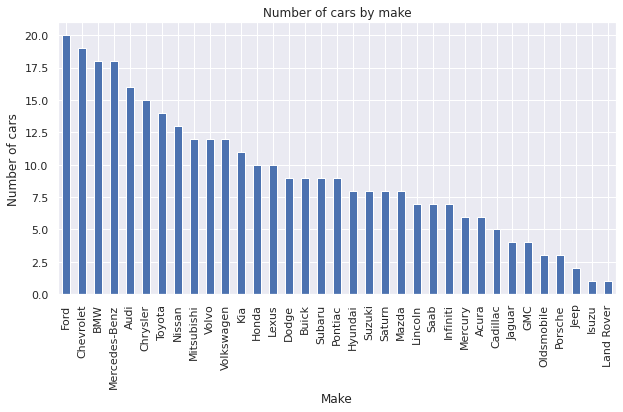

In [26]:
# Plotting a Histogram
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

**Heat Maps**

Heat Maps is a plot which is necessary when we need to find the dependent variables. One of the best ways to find the correlation between the features can be done using heat maps. As shown below the price feature (MSRP) has a strong correlation with Horsepower of 83% this is very important because the more the relationship between the variables the more accurate the model will be. This is how the correlation between the features can be found using heat maps. With the help of heat maps I can use these related features in building my model.

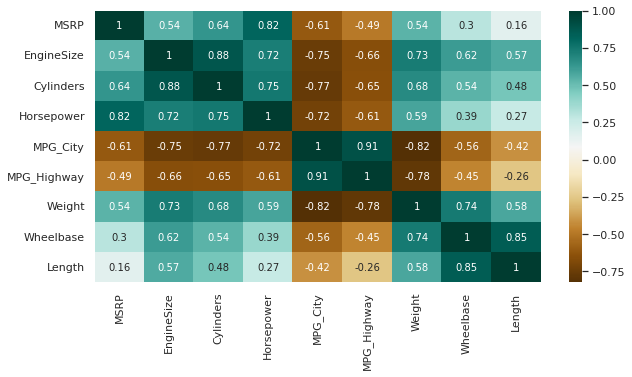

In [27]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**Scatterplot between two related varirables**

I know the features especially MSRP and the Horsepower are more related. Since I have two related variables I used a scatter plot to show their relationship. Here the scatter plots are plotted between Horsepower and MSRP are as shown below. With the plot given below, we can easily draw a trend line during modeling. I can easily see a line of best fit in the plot. I have not included the scatter plot between MSRP and Engine Size or Cylinders the reason for this is that these data have comparatively less correlation with the MSRP than that of MSRP and Horsepower which is 83%. Because as seen above the correlation between MSRP and Engine Size is of 54% and that of MSRP and Cylinders is of 64% so there is no reason to plot these features.

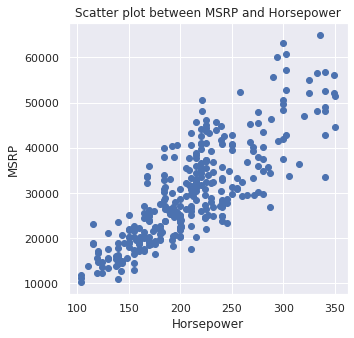

In [28]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['Horsepower'], df['MSRP'])
plt.title('Scatter plot between MSRP and Horsepower')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MSRP')
plt.show()



---



## 5) Reporting Initial Findings

I think there is a high relationship between the MSRP (Price) and the Horsepower feature of the car. I will explore more about that in assignment 4. Now I know my problem statement is “Predicting the price (MSRP) of the car given the specifications of the car”. The main idea is to predict the (MSRP) price of the car. Now I know that I have to predict a value so I should use Regression Algorithms because I have two related features (independent and dependent features). But there are many types of Regression Algorithms such as Linear Regression, Random Forest Regression, Lasso and Ridge Regression and many more. So I might use one of these algorithms and implement a machine learning model to predict the price in assignment 4. Hence this assignment which mainly deals with Exploratory Data Analysis where I prepared my data in such a way that it is now ready for building a model. 




---



## References

[1] Janjughazyan, L. (2017). Cars Data. [online] Kaggle.com. Available at: https://www.kaggle.com/ljanjughazyan/cars1 [Accessed 15 Aug. 2019].

[2] Srinivasan, R. (2017). Automobile Dataset. [online] Kaggle.com. Available at: https://www.kaggle.com/toramky/automobile-dataset [Accessed 16 Aug. 2019].

[3] Sharma, N. (2018). Ways to Detect and Remove the Outliers. [online] Medium. Available at: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba [Accessed 15 Aug. 2019].